In [1]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
# import datasets
st = datetime.datetime.now()
train_data = pd.read_csv("../data/train.csv")
test_data = pd.read_csv("../data/test_QkPvNLx.csv")
print("total time req to load data ",datetime.datetime.now() - st)

total time req to load data  0:00:00.744450


In [3]:
# check initial train data
train_data.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [4]:
test_data.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007
1,884,884,1,Development,Course,1,0,1,0.007
2,885,885,1,Development,Course,1,0,1,0.007
3,886,886,1,Development,Course,1,0,1,0.007
4,887,887,1,Development,Course,0,0,1,0.007


In [8]:
# check training and testing observations
train_data.shape,test_data.shape

((512087, 11), (36000, 9))

# Intial Observations

## check whether courses are occuring on particular day 

### no such pattern like particular course is occuring on particular day

In [8]:
# check total unique days
train_data.Day_No.unique().shape

(882,)

In [9]:
# max occuring day
train_data.Day_No.value_counts()

767    600
335    600
846    600
334    600
78     600
845    600
333    600
77     600
844    600
332    600
76     600
843    600
331    600
75     600
842    600
330    600
74     600
841    600
329    600
73     600
840    600
328    600
72     600
79     600
847    600
327    600
80     600
87     600
854    600
342    600
      ... 
679    507
684    507
589    507
678    507
590    507
677    507
591    507
676    507
592    507
584    507
583    507
574    507
578    507
693    507
575    507
692    507
576    507
691    507
577    507
690    507
689    507
685    507
579    507
688    507
580    507
687    507
581    507
686    507
582    507
695    507
Name: Day_No, Length: 882, dtype: int64

In [10]:
# check unique frequncy of days
train_data.Day_No.value_counts().unique()

array([600, 599, 507], dtype=int64)

# check for which type of domain max courses are available

In [11]:
train_data.Course_Domain.value_counts()

Development             264295
Software Marketing      166172
Finance & Accounting     77210
Business                  4410
Name: Course_Domain, dtype: int64

In [6]:
train_data.groupby("Course_Domain").agg({"Course_ID":"nunique"})

,Course_ID
Course_Domain,
Business,5
Development,308
Finance & Accounting,89
Software Marketing,198


In [9]:
train_data.groupby("Course_Domain").agg({"Course_Type":"nunique"})

,Course_Type
Course_Domain,
Business,2
Development,2
Finance & Accounting,2
Software Marketing,2


## check if sales are varying according to course domain

### as you can see deviation in sales based on course domain. although less deviation in Finance & Accounting  and Business course type                  

### course domain can be one of the imp feature we can consider

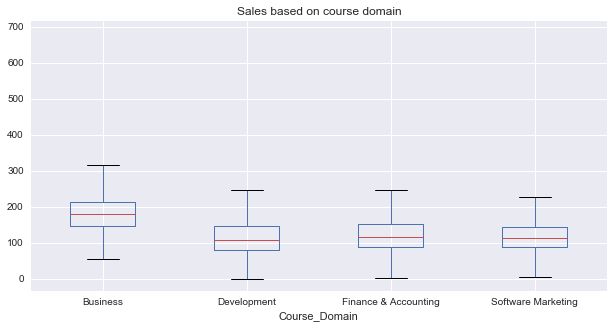

In [20]:
train_data.boxplot(column="Sales",by="Course_Domain",figsize=(10,5))
plt.title("Sales based on course domain")
plt.suptitle("")
plt.show()
plt.clf()
plt.close()

## check what type of courses are available

## as you can see people are appearing for Degree course as compare to Course or Program

In [21]:
train_data.Course_Type.value_counts()

Course     262747
Program    247576
Degree       1764
Name: Course_Type, dtype: int64

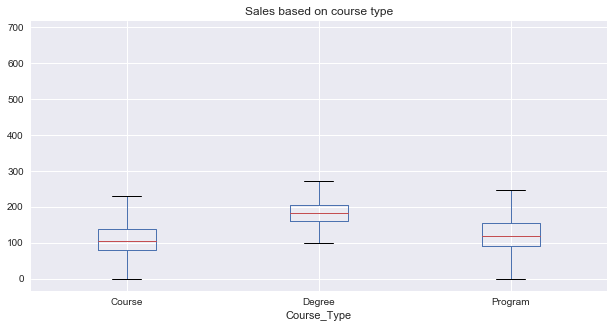

In [22]:
train_data.boxplot(column="Sales",by="Course_Type",figsize=(10,5))
plt.title("Sales based on course type")
plt.suptitle("")
plt.show()
plt.clf()
plt.close()

## now collectively look for sales based on course domain and course type

## you can also noticed same thing, degree courses in busniess domain is more demanding compare to others. for other type of courses less deviation in sales

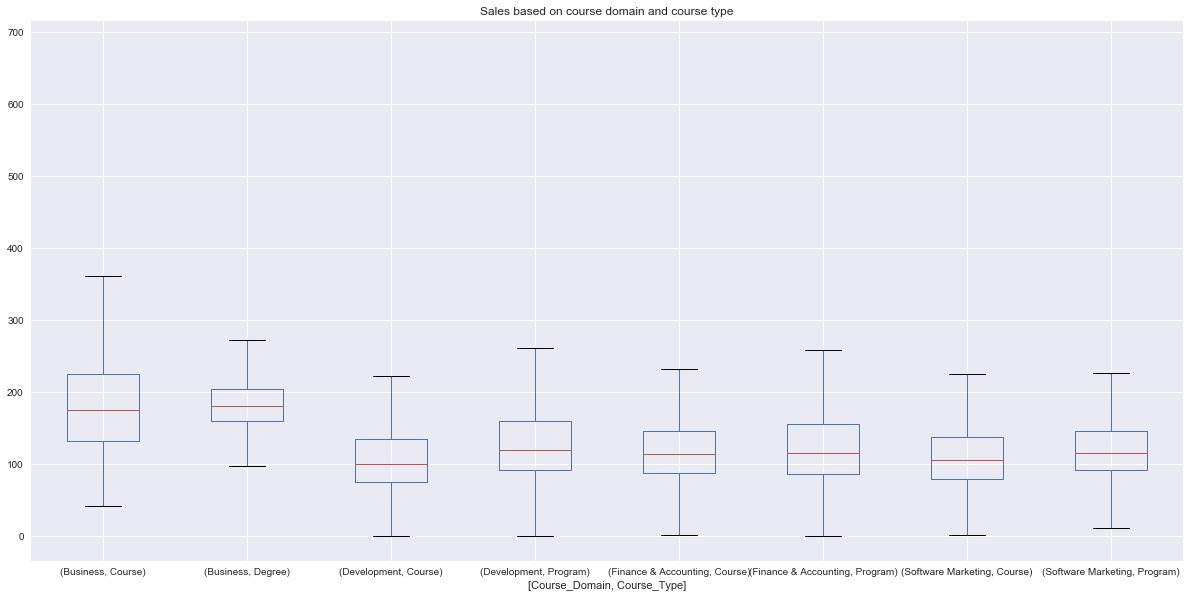

In [24]:
train_data.boxplot(column="Sales",by=["Course_Domain","Course_Type"],figsize=(20,10))
plt.title("Sales based on course domain and course type")
plt.suptitle("")
plt.show()
plt.clf()
plt.close()

# check for each courses what is max user traffic

## it shows, user traffic and sales are not directly proportional. means if people are surfing more for particular course it doesn't mean they will buy that course

In [29]:
train_data.groupby("Course_Domain").agg({"User_Traffic":"max","Sales":"max"})

,User_Traffic,Sales
Course_Domain,,
Business,95256,569
Development,100002,640
Finance & Accounting,63525,569
Software Marketing,69258,682


## check Competition Metric and how it impact sales

## found very less correlation with competition metric

In [6]:
train_data["Competition_Metric"].describe()

count    510323.000000
mean          0.073345
std           0.100115
min           0.000000
25%           0.010000
50%           0.035000
75%           0.094000
max           0.768000
Name: Competition_Metric, dtype: float64

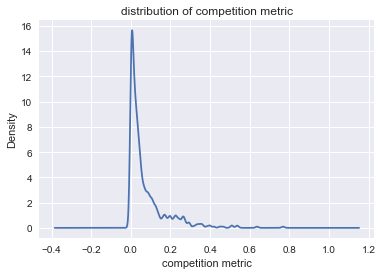

In [16]:
train_data.Competition_Metric.plot.kde()
plt.title("distribution of competition metric")
plt.xlabel("competition metric")
plt.suptitle("")
plt.show()
plt.clf()
plt.close()

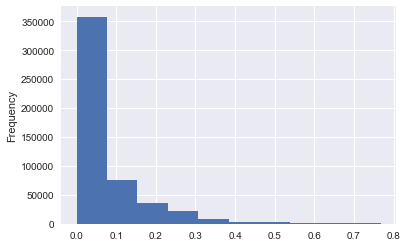

In [18]:
train_data.Competition_Metric.plot.hist()

In [19]:
# check correlation between competition metric and sales
train_data[["Competition_Metric","Sales"]].corr()

,Competition_Metric,Sales
Competition_Metric,1.000000,-0.022085
Sales,-0.022085,1.000000


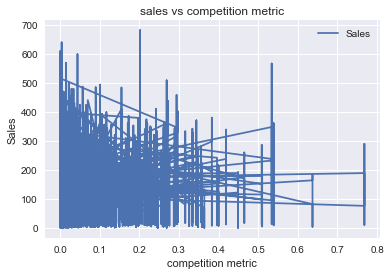

In [25]:
train_data.plot(x="Competition_Metric",y="Sales")
plt.title("sales vs competition metric")
plt.xlabel("competition metric")
plt.ylabel("Sales")
plt.suptitle("")
plt.show()
plt.clf()
plt.close()

In [31]:
# g =sns.pairplot(train_data[["Sales","Competition_Metric"]])
# plt.show()
# plt.clf()
# plt.close()

## lets see, what kind of promotion impacting no of sales

### lt seems short term promotions are impacting sales compare to long term if we look at average sales 

### Here you can see variation in sales based on short promotion

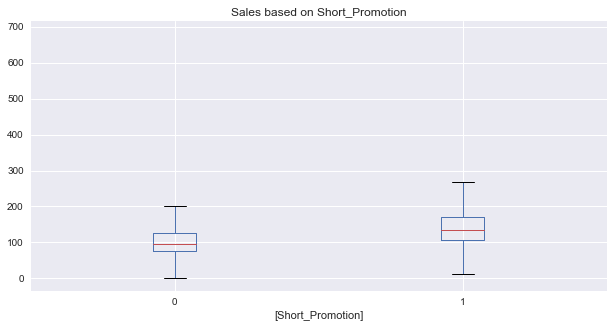

In [34]:
train_data.boxplot(column="Sales",by=["Short_Promotion"],figsize=(10,5))
plt.title("Sales based on Short_Promotion")
plt.suptitle("")
plt.show()
plt.clf()
plt.close()

In [9]:
train_data.groupby("Short_Promotion")["Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Short_Promotion,,,,,,,,
0,317369.0,105.169213,46.427592,0.0,76.0,97.0,126.0,640.0
1,194718.0,146.347277,56.620365,0.0,108.0,136.0,172.0,682.0


## not so high devation in sales for long Promotion

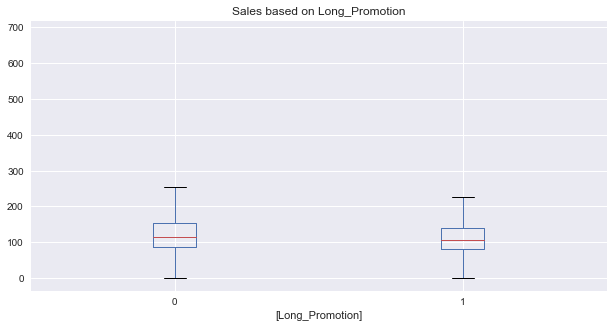

In [35]:
train_data.boxplot(column="Sales",by=["Long_Promotion"],figsize=(10,5))
plt.title("Sales based on Long_Promotion")
plt.suptitle("")
plt.show()
plt.clf()
plt.close()

In [10]:
train_data.groupby("Long_Promotion")["Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Long_Promotion,,,,,,,,
0,261693.0,126.646506,58.010949,0.0,88.0,116.0,154.0,640.0
1,250394.0,114.744734,49.525795,0.0,81.0,106.0,139.0,682.0


In [12]:
train_data.groupby(["Long_Promotion","Short_Promotion"])["Sales"].describe().reset_index()

,Long_Promotion,Short_Promotion,count,mean,std,min,25%,50%,75%,max
0,0,0,162043.0,111.109261,50.846527,0.0,78.0,102.0,134.0,640.0
1,0,1,99650.0,151.911952,60.021777,0.0,111.0,140.0,180.0,625.0
2,1,0,155326.0,98.972291,40.396610,0.0,73.0,93.0,119.0,578.0
3,1,1,95068.0,140.514400,52.187623,0.0,105.0,132.0,165.0,682.0


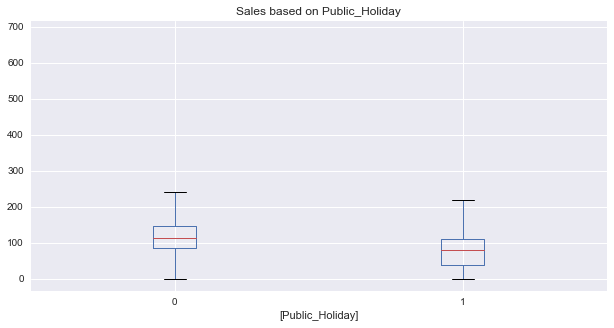

In [36]:
train_data.boxplot(column="Sales",by=["Public_Holiday"],figsize=(10,5))
plt.title("Sales based on Public_Holiday")
plt.suptitle("")
plt.show()
plt.clf()
plt.close()

## No Holiday more sales | Holiday less sales

In [13]:
train_data.groupby("Public_Holiday")["Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Public_Holiday,,,,,,,,
0,495885.0,122.153818,53.893176,0.0,85.0,112.0,147.0,682.0
1,16202.0,80.215467,52.748521,0.0,38.0,78.0,110.0,441.0


In [15]:
train_data.groupby(["Public_Holiday","Long_Promotion","Short_Promotion"])["Sales"].describe().reset_index()

,Public_Holiday,Long_Promotion,Short_Promotion,count,mean,std,min,25%,50%,75%,max
0,0,0,0,156637.0,112.399771,50.186465,0.0,79.0,102.0,134.0,640.0
1,0,0,1,97149.0,153.024920,59.745703,1.0,113.0,141.0,181.0,625.0
2,0,1,0,149874.0,100.117032,39.668040,0.0,74.0,94.0,119.0,578.0
3,0,1,1,92225.0,142.012741,51.701323,22.0,106.0,133.0,166.0,682.0
4,1,0,0,5406.0,73.717166,55.423507,0.0,24.0,67.0,107.0,368.0
5,1,0,1,2501.0,108.679728,54.507014,0.0,73.0,100.0,134.0,403.0
6,1,1,0,5452.0,67.503668,47.005683,0.0,24.0,65.0,97.0,441.0
7,1,1,1,2843.0,91.909251,43.906635,0.0,65.0,89.0,116.5,339.0
